<a href="https://colab.research.google.com/github/brennoliveira/ML-Bolsa-Familia/blob/main/C%C3%B3pia_de_An%C3%A1lise_Bolsa_Fam%C3%ADlia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('data_familia_sergipe.csv')
dp = pd.read_csv('data_pessoas_sergipe.csv')

In [ ]:
df.head()
# 1. NORMALIZAR OS DADOS
# 2. REDUZIR VARIÁVEIS
# 

# df.corr()

# A PARTIR DA CORRELAÇÃO, IDENTIFICAMENTO UMA CORRELAÇÃO NEGATIVA FORTE ENTRE marc_pbf e vlr_renda_media_fam

# dp.corr()

# A PARTIR DA CORRELAÇÃO, IDENTIFICAMENTO UMA CORRELAÇÃO POSITIVA FORTE ENTRE idade e cod_curso_frequenta_memb


,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,2806206,2,3,183415.0,2006-01-07,2018-09-30,58.0,2018-02-27,1.0,1.0,...,2.0,2.0,P S IVA SALGUEIRO,2421836.0,CRAS CENTRO DE REFERENCIA DA ASSISTENCIA SOCIAL,2.806200e+10,0.0,0.0,4.0,5.500528e+14
1,2803609,2,3,183416.0,2010-03-09,2018-09-30,190.0,2018-07-20,2.0,1.0,...,2.0,2.0,POSTO DE SAUDE RICARDO HAGENBECK,2421380.0,CRAS ANGELA MARIA DE CARVALHO LIMA BOMFIM,2.803602e+10,0.0,0.0,5.0,5.502451e+14
2,2803203,2,3,183417.0,2006-02-25,2018-09-30,100.0,2018-08-21,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1.0,2.0,5.503059e+14
3,2805703,2,3,183418.0,2004-05-25,2017-12-15,937.0,2017-11-09,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,5.504057e+14
4,2805307,1,3,183419.0,2016-03-31,2018-10-15,25.0,2018-10-15,2.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1.0,2.0,5.502451e+14


In [ ]:
# PORCENTAGEM DE PESSOAS QUE RECEBEM BOLSA FAMILIA
df_recebem = df.query('marc_pbf == 1')
df_recebem

df.marc_pbf.value_counts(normalize=True)*100

1    61.460954
0    38.539046
Name: marc_pbf, dtype: float64

In [ ]:
# QUEM RECEBE BF COMPARADO COM A RENDA MEDIA
frequencia = pd.crosstab(df.marc_pbf, df.vlr_renda_media_fam)
frequencia

vlr_renda_media_fam,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,2515.0,2542.0,2600.0,2638.0,2700.0,2701.0,2739.0,2791.0,2800.0,2811.0
marc_pbf,,,,,,,,,,,,,,,,,,,,,
0,338,1,12,7,22,27,35,18,47,2,...,1,1,1,1,2,1,1,1,2,2
1,2757,102,293,237,456,465,567,191,840,119,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# MÉDIA DA RENDA MÉDIA ENTRE AS PESSOAS QUE RECEBEM E N RECEBEM BOLSA FAMILIA
df.groupby(['marc_pbf'])['vlr_renda_media_fam'].mean()



,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
2,2803203,2,3,183417.0,2006-02-25,2018-09-30,100.0,2018-08-21,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550305936601879
4,2805307,1,3,183419.0,2016-03-31,2018-10-15,25.0,2018-10-15,2.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550245146328323
5,2802106,2,3,183420.0,2017-08-09,2017-08-11,37.0,2017-08-09,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550211532882945
6,2801405,2,3,183421.0,2002-03-15,2018-09-30,50.0,2017-07-11,2.0,1.0,...,2.0,2.0,NaN,NaN,CRAS VIVER MELHOR,2.801400e+10,0.0,1,3,550059617571366
7,2803500,2,3,183422.0,2004-04-22,2018-11-20,41.0,2018-11-20,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,205.0,1,3,550223874258551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82267,2800308,2,1,4250240.0,2009-10-19,2018-09-30,133.0,2017-08-03,1.0,1.0,...,2.0,2.0,US OSVALDO LEITE TERRA DURA,2216.0,CRAS SANTA MARIA,2.800300e+10,0.0,1,3,550245146328323
82268,2800308,2,1,4250241.0,2016-08-29,2018-10-01,75.0,2016-08-29,1.0,1.0,...,2.0,2.0,US DONA JOVEM AZEVEDO INDUSTRIAL,2763.0,CRAS PEDRO AVERAN,2.800302e+10,0.0,1,3,550245146328323
82270,2800308,2,1,4250243.0,2018-12-05,2018-12-05,100.0,2018-12-05,1.0,1.0,...,2.0,2.0,US JOSE QUINTILIANO DA FONSECA SOBRAL CIDADE NOVA,2771.0,CRAS RISOLETA NEVES,2.800300e+10,0.0,1,3,550245146328323
82271,2800308,2,1,4250244.0,2012-10-15,2018-10-01,8.0,2018-08-13,1.0,1.0,...,2.0,2.0,US JOAO BEZERRA AREIA BRANCA,3425.0,CRAS ANTONIO VALENCA ROLLEMBERG,2.800300e+10,0.0,1,3,550245146328323


In [ ]:
df_recebem.mode()

# MAIS FAMILIAS DA REGIÁO OUTRAS RECEBEM 
# MAIS FAMILIAS DA ZONA URBANA
# MAIS FAMILIAS COM 2 PESSOAS

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,2800308.0,2.0,3.0,183417.0,2003-03-13,2018-09-30,50.0,2018-09-11,1.0,1.0,...,2.0,2.0,CENTRO DE SAUDE JOSE NAILSON MOURA,3010732.0,CENTRO DE REFERENCIA DA ASSISTENCIA SOCIAL CRAS,2.804500e+10,0.0,1.0,2.0,5.502451e+14
1,NaN,NaN,NaN,183419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,183420.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,183421.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,183422.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50562,NaN,NaN,NaN,4250240.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50563,NaN,NaN,NaN,4250241.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50564,NaN,NaN,NaN,4250243.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50565,NaN,NaN,NaN,4250244.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_recebem.vlr_renda_media_fam.quantile([i / 10 for i in range(1,10)])

0.1     7.0
0.2    17.0
0.3    27.0
0.4    40.0
0.5    50.0
0.6    60.0
0.7    70.0
0.8    80.0
0.9    96.4
Name: vlr_renda_media_fam, dtype: float64

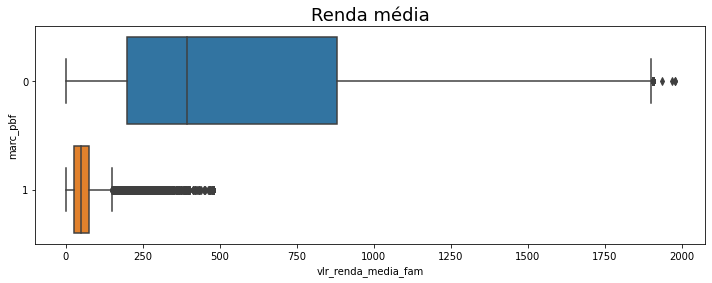

In [ ]:
ax = sns.boxplot(x = 'vlr_renda_media_fam', y = 'marc_pbf', data = df.query('vlr_renda_media_fam < 2000'), orient = 'h')
ax.figure.set_size_inches(12,4)
ax.set_title('Renda média', fontsize=18)
ax

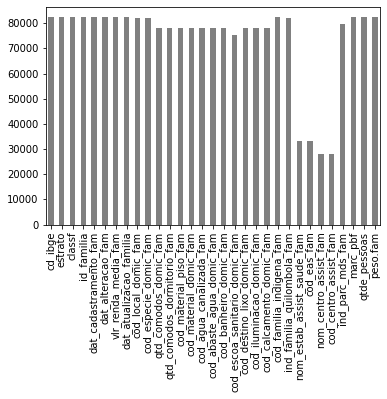

In [ ]:
count_df = df.count()
count_df
count_df.plot(kind="bar", color='grey')


count_dp = dp.count()
count_dp
count_dp.plot(kind="bar", color='grey')


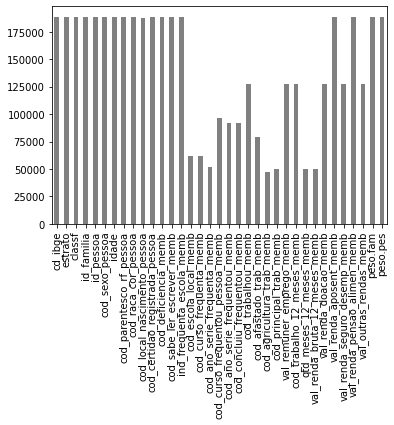

In [ ]:
count_dp = dp.count()
count_dp
count_dp.plot(kind="bar", color='grey')